# Exploratory data Analysis for Retail Transaction

Introduction

This analysis focuses on a retail data analysis and it include various factors of analysis like identifying top purchesed products, payment method preference,city wise sales,Seasonal Promotions and various factors related to the retail data.
 

Column name discribution

Transaction_ID: A unique identifier for each transaction, represented as a 10-digit number. This column is used to uniquely identify each purchase.

Date: The date and time when the transaction occurred. It records the timestamp of each purchase.

Customer_Name: The name of the customer who made the purchase. It provides information about the customer's identity.

Product: A list of products purchased in the transaction. It includes the names of the products bought.

Total_Items: The total number of items purchased in the transaction. It represents the quantity of products bought.

Total_Cost: The total cost of the purchase, in currency. It represents the financial value of the transaction.

Payment_Method: The method used for payment in the transaction, such as credit card, debit card, cash, or mobile payment.

City: The city where the purchase took place. It indicates the location of the transaction.

Store_Type: The type of store where the purchase was made, such as a supermarket, convenience store, department store, etc.

Discount_Applied: A binary indicator (True/False) representing whether a discount was applied to the transaction.

Customer_Category: A category representing the customer's background or age group.

Season: The season in which the purchase occurred, such as spring, summer, fall, or winter.

Promotion: The type of promotion applied to the transaction, such as "None," "BOGO (Buy One Get One)," or "Discount on Selected Items."



Assumptions for this analysis



1.How many of the customers had different promotions?

2.what are the top 5 most purchesed product across all seasons?

3.Which city has the highest average spending per transaction, and how does it compare to other cities?

4.Does applying a discount increase the average number of items purchased in a transaction?

5.which type of payment method mostly customers done?

6.Are there repeat customers in the dataset, and what is their average spending compared to one-time customers?

7.What is the average total cost per transaction for each store type (e.g., Warehouse Club, Specialty Store, Pharmacy)?

8.Which store type offers the widest variety of products in a single transaction (based on Total_Items)?

9.Which store type offers the widest variety of products in a single transaction (based on Total_Items)?

10.Are customers more likely to use promotions during a particular season?

11.How does the number of transactions vary by season (Winter, Spring, Summer, Fall)?








In [19]:
import pandas as pd

df=pd.read_csv('D:\\retail_transaction_dataset.csv') 

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     2045 non-null   int64  
 1   Date               2045 non-null   object 
 2   Customer_Name      2045 non-null   object 
 3   Product            2045 non-null   object 
 4   Total_Items        2045 non-null   int64  
 5   Total_Cost         2045 non-null   float64
 6   Payment_Method     2045 non-null   object 
 7   City               2045 non-null   object 
 8   Store_Type         2045 non-null   object 
 9   Discount_Applied   2045 non-null   bool   
 10  Customer_Category  2045 non-null   object 
 11  Season             2045 non-null   object 
 12  Promotion          2045 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 193.8+ KB
None


In [20]:
# print(df.isnull())
print(df.duplicated())


0       False
1       False
2       False
3       False
4       False
        ...  
2040    False
2041    False
2042    False
2043    False
2044    False
Length: 2045, dtype: bool


In [21]:
df['Date']=pd.to_datetime(df['Date'])
print(df.to_string())

      Transaction_ID                Date             Customer_Name                                                                                    Product  Total_Items  Total_Cost  Payment_Method           City         Store_Type  Discount_Applied Customer_Category  Season                   Promotion
0         1000000000 2022-01-21 06:27:00              Stacey Price                                                ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65  Mobile Payment    Los Angeles     Warehouse Club              True         Homemaker  Winter                        None
1         1000000001 2023-01-03 13:01:00          Michelle Carlson                                    ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'Potatoes']            2       25.93            Cash  San Francisco    Specialty Store              True      Professional    Fall      BOGO (Buy One Get One)
2         1000000002 2024-03-21 15:37:00               Lisa Graves                   

In [22]:
print(df.describe())

       Transaction_ID  Total_Items   Total_Cost
count    2.045000e+03  2045.000000  2045.000000
mean     1.000001e+09     5.490465    52.646504
std      5.904850e+02     2.838016    27.292580
min      1.000000e+09     1.000000     5.090000
25%      1.000001e+09     3.000000    29.400000
50%      1.000001e+09     6.000000    52.800000
75%      1.000002e+09     8.000000    75.870000
max      1.000002e+09    10.000000    99.970000


In [23]:
df.isna().sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

In [24]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:00,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,None
1,1000000001,2023-01-03 13:01:00,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:00,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,None
3,1000000003,2020-10-31 09:59:00,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,None
4,1000000004,2020-10-12 00:59:00,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [25]:
df.tail()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
2040,1000002040,2021-04-23 02:50:00,Kayla Hines,"['Apple', 'Beef', 'Spinach', 'Milk']",5,35.11,Mobile Payment,Miami,Department Store,False,Teenager,Spring,BOGO (Buy One Get One)
2041,1000002041,2021-07-28 16:00:00,Brandon Hahn,"['Chips', 'Banana']",6,6.91,Credit Card,Atlanta,Department Store,False,Professional,Fall,None
2042,1000002042,2023-10-26 06:18:00,Jason Delgado,['Bread'],4,92.36,Mobile Payment,Los Angeles,Warehouse Club,False,Teenager,Fall,None
2043,1000002043,2020-01-03 00:33:00,James Mitchell,"['BBQ Sauce', 'Toothpaste', 'Baby Wipes']",2,19.01,Mobile Payment,Houston,Supermarket,True,Professional,Winter,Discount on Selected Items
2044,1000002044,2024-02-16 04:04:00,Ashley Walker,"['Apple', 'Tea']",1,13.51,Credit Card,Seattle,Convenience Store,True,Professional,Spring,BOGO (Buy One Get One)


In [26]:
df.shape


(2045, 13)

Distribution of promotions

['None', 'BOGO (Buy One Get One)', 'None', 'None', 'Discount on Selected Items', 'Discount on Selected Items', 'Discount on Selected Items', 'Discount on Selected Items', 'None', 'None', 'BOGO (Buy One Get One)', 'Discount on Selected Items', 'Discount on Selected Items', 'BOGO (Buy One Get One)', 'None', 'BOGO (Buy One Get One)', 'None', 'None', 'BOGO (Buy One Get One)', 'Discount on Selected Items', 'Discount on Selected Items', 'BOGO (Buy One Get One)', 'BOGO (Buy One Get One)', 'BOGO (Buy One Get One)', 'None', 'BOGO (Buy One Get One)', 'Discount on Selected Items', 'None', 'None', 'Discount on Selected Items', 'None', 'None', 'None', 'Discount on Selected Items', 'BOGO (Buy One Get One)', 'None', 'Discount on Selected Items', 'BOGO (Buy One Get One)', 'None', 'None', 'None', 'Discount on Selected Items', 'Discount on Selected Items', 'Discount on Selected Items', 'None', 'Discount on Selected Items', 'None', 'None', 'Discount on Selected Items', 'Discount on Selected Items', 'Disc

<Figure size 800x600 with 0 Axes>

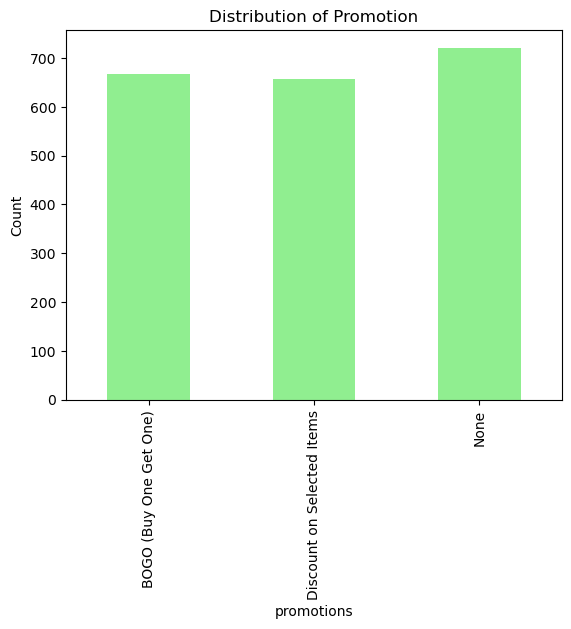

In [27]:
#How many of the customers had different promotions?
import matplotlib.pyplot as plt
import pandas as pd
Store_list = df['Promotion'].tolist()
print(Store_list)
test= df.groupby(['Promotion'])
# test.describe()
count= test.count()
print(count)

plt.figure(figsize=(8,6))
count.plot(kind='bar', color='lightgreen',legend=False)

# Set title and labels
plt.title("Distribution of Promotion")
plt.xlabel("promotions")
plt.ylabel("Count")

# Show the plot
plt.show()


Product preference analysis

Top 5 most purchased products:
Toothpaste      152
Pickles          96
Ketchup          95
Dish Soap        93
Paper Towels     93
Name: Product, dtype: int64


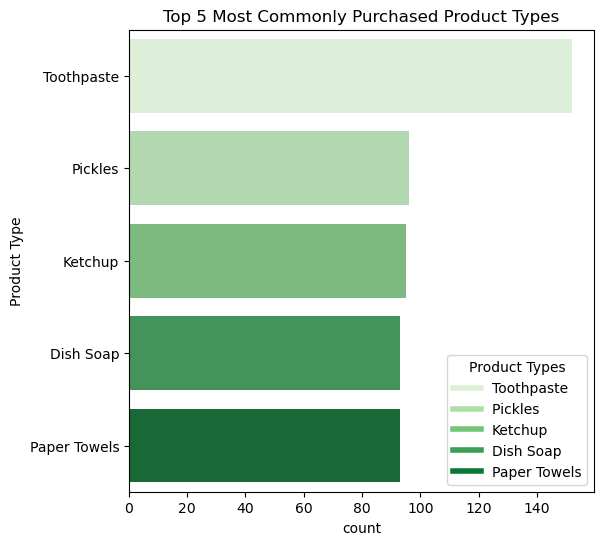

In [28]:
#what are the top 5 most purchesed product across all seasons
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('D:\\retail_transaction_dataset.csv') 
df.head(10)

# Expand the Product column, which contains lists of products
# Create a new DataFrame by exploding the Product column
df['Product'] = df['Product'].apply(eval)  # Convert string representation of list to actual list
expanded_df = df.explode('Product')

# Count occurrences of each product
top_products = expanded_df['Product'].value_counts().head()


print("Top 5 most purchased products:")
print(top_products)
plt.figure(figsize=(6,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Greens')
plt.title('Top 5 Most Commonly Purchased Product Types')
plt.xlabel('count')
plt.ylabel('Product Type')
legend_labels = ['Toothpaste' , 'Pickles ', 'Ketchup','Dish Soap' ,'Paper Towels'] 
handles=[plt.Line2D([0],[0],color=color,lw=4)for color in sns.color_palette('Greens',5)]
plt.legend(handles,legend_labels,title='Product Types')
plt.show()




The top 5 most purchased products form the above graph.The most purched product is Toothpaste.

City-wise sales Distribution

In [29]:
#Which city has the highest average spending per transaction, and how does it compare to other cities?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('D:\\retail_transaction_dataset.csv') 
print(df.columns.tolist())

# Group by City and calculate the average total cost per transaction
average_spending_per_city = df.groupby('City')['Total_Cost'].mean()

# Sort the cities by average spending in descending order
average_spending_per_city = average_spending_per_city.sort_values(ascending=False)

# Display the result
print(average_spending_per_city)

# Get the city with the highest average spending
highest_spending_city = average_spending_per_city.idxmax()
highest_spending_value =average_spending_per_city.max()
x=int(highest_spending_value)
print(f"The city with the highest average spending is {highest_spending_city}, with an average of {x} per transaction.")



['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items', 'Total_Cost', 'Payment_Method', 'City', 'Store_Type', 'Discount_Applied', 'Customer_Category', 'Season', 'Promotion']
City
Miami            57.445051
San Francisco    54.734311
Boston           53.828474
Los Angeles      53.153470
Chicago          52.161221
Dallas           52.135211
Atlanta          51.224301
Seattle          51.102607
Houston          50.295333
New York         50.095611
Name: Total_Cost, dtype: float64
The city with the highest average spending is Miami, with an average of 57 per transaction.


Miami city has the highest average spending per transaction.

Discount impact on sales

['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items', 'Total_Cost', 'Payment_Method', 'City', 'Store_Type', 'Discount_Applied', 'Customer_Category', 'Season', 'Promotion']
How many of the customers had no discount applied: 1013
How many of the customers had  discount applied: 1032


<function matplotlib.pyplot.show(close=None, block=None)>

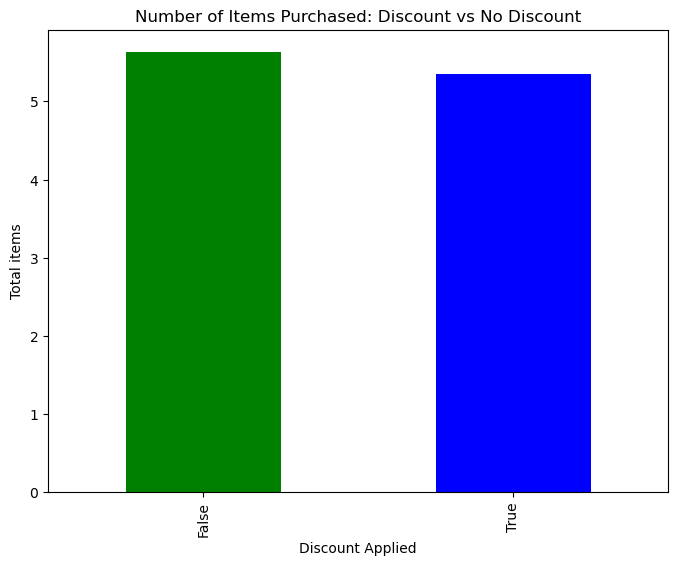

In [30]:
#Does applying a discount increase the average number of items purchased in a transaction?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy import stats

# Sample data: Replace this with your actual transaction data


# Create a DataFrame
df=pd.read_csv('D:\\retail_transaction_dataset.csv') 
print(df.columns.tolist())
# df = pd.DataFrame(data)
if 'Discount_Applied'  in df.columns:
 count_with_discount = df[df['Discount_Applied'] == True].shape[0]
 count_without_discount = df[df['Discount_Applied'] == False].shape[0]
 print("How many of the customers had no discount applied:", count_without_discount)
 print("How many of the customers had  discount applied:",count_with_discount )

# Visualize the difference
plt.figure(figsize=(8,6))
df.groupby('Discount_Applied')['Total_Items'].mean().plot(kind='bar', color=['green', 'blue'])
plt.title('Number of Items Purchased: Discount vs No Discount')
plt.xlabel('Discount Applied')
plt.ylabel('Total items')
plt.show

The most of the customer had Discount Applied.

Payment Method Distribution

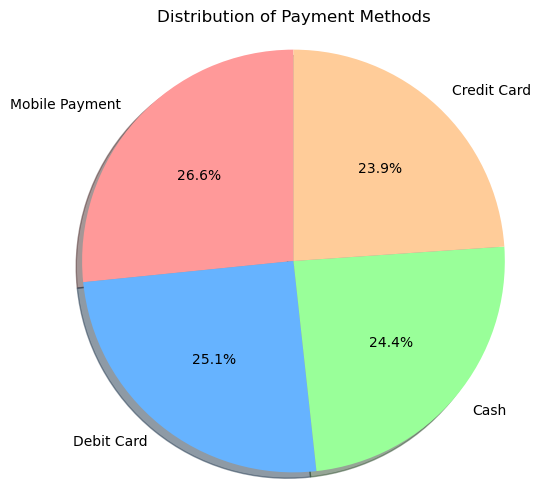

In [31]:
#which payment method mostly customers done
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: Replace this with your actual transaction data
data = {
    'payment_Method': ['Payment_Method']
    
}


# Create a DataFrame
df=pd.read_csv('D:\\retail_transaction_dataset.csv') 

# df = pd.DataFrame(data)

# Count the number of transactions for each payment method
# payment_counts = df['payment_Method'].value_counts()
payment_counts = df['Payment_Method'].value_counts()

# Calculate percentages
total_transactions = payment_counts.sum()
percentages = (payment_counts / total_transactions) * 100


# Data for the pie chart
labels = payment_counts.index
sizes = percentages.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom colors for each category

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  # Ensures that the pie chart is a circle

# Adding a title
plt.title('Distribution of Payment Methods')

# Show the pie chart
plt.show()

The most of the customers use mobile payment for  payment method.

Repeat Customer Analysis

In [32]:
# Are there repeat customers in the dataset, and what is their average spending compared to one-time customers?Repeat Customer Analysis


import pandas as pd

# Load the dataset
# Replace 'your_dataset.csv' with your actual file path or DataFrame
data = pd.read_csv('D:\\retail_transaction_dataset.csv')

# Group by CustomerID and calculate the number of purchases and total spending
customer_summary = data.groupby('Customer_Name')['Total_Cost'].agg(['count', 'sum']).reset_index()

# Identify repeat and one-time customers
repeat_customers = customer_summary[customer_summary['count'] > 1]
one_time_customers = customer_summary[customer_summary['count'] == 1]

# Calculate average spending for repeat and one-time customers
avg_spending_repeat = repeat_customers['sum'].mean()
avg_spending_one_time = one_time_customers['sum'].mean()

print("Average spending of repeat customers:", avg_spending_repeat)
print("Average spending of one-time customers:", avg_spending_one_time)

Average spending of repeat customers: 108.8225
Average spending of one-time customers: 52.669251769464104


The spendingof repeat customer is less than one time customers.

Average Spending By Store Type

In [33]:
#  What is the average total cost per transaction for each store type (e.g., Warehouse Club, Specialty Store, Pharmacy)?
import pandas as pd

data = pd.read_csv('D:\\retail_transaction_dataset.csv')

# Group by Store_Type and calculate the average of Total_Cost
average_cost_by_store_type = data.groupby('Store_Type')['Total_Cost'].mean().reset_index()

print(average_cost_by_store_type)


          Store_Type  Total_Cost
0  Convenience Store   54.018914
1   Department Store   52.964677
2           Pharmacy   52.328190
3    Specialty Store   51.504102
4        Supermarket   52.381737
5     Warehouse Club   52.551879


The convenience store has high total cost is 54.

Store Type and Product Diversity

In [34]:
# Which store type offers the widest variety of products in a single transaction (based on Total_Items)? 
import pandas as pd

# Load the dataset
# Replace 'your_dataset.csv' with your actual file path or DataFrame
data = pd.read_csv('D:\\retail_transaction_dataset.csv')

# Group by Store_Type and find the maximum Total_Items in each group
store_type_max_items = data.groupby('Store_Type')['Total_Items'].max().reset_index()

# Sort by maximum Total_Items in descending order to see which store type has the most diverse selection
store_type_max_items = store_type_max_items.sort_values(by='Total_Items', ascending=False)

print(store_type_max_items)

          Store_Type  Total_Items
0  Convenience Store           10
1   Department Store           10
2           Pharmacy           10
3    Specialty Store           10
4        Supermarket           10
5     Warehouse Club           10


The store type offers the widest variety of products in a single transaction (based on Total_Items) is 10.So that good varity of products in the stores and all are same.

Seasonal Promotion Effectiveness

Seasonal promotion Effectiveness:
Winter    557
Fall      511
Spring    508
Summer    469
Name: Season, dtype: int64


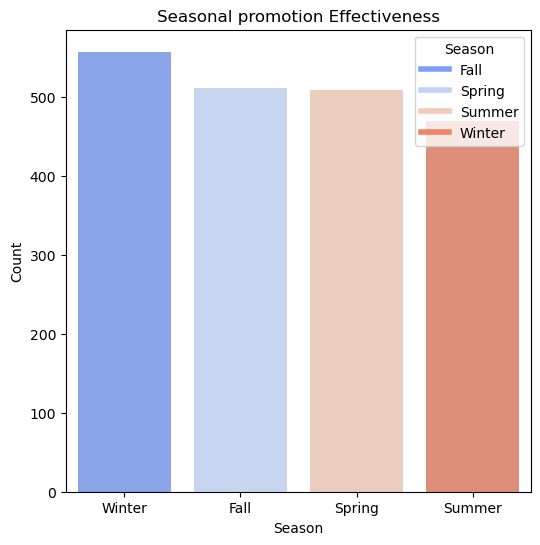

In [35]:
#  Are customers more likely to use promotions during a particular season
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('D:\\retail_transaction_dataset.csv')

Promotion_Count=df['Season'].value_counts()
print("Seasonal promotion Effectiveness:")
print(Promotion_Count)

plt.figure(figsize=(6,6))
sns.barplot(x=Promotion_Count.index,y=Promotion_Count.values,palette='coolwarm')
legend_labels=['Fall','Spring','Summer','Winter']
handles=[plt.Line2D([0],[0],color=color,lw=4)for color in sns.color_palette('coolwarm',4)]
plt.legend(handles,legend_labels,title='Season')

plt.title('Seasonal promotion Effectiveness')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



The above analysis can understand that customers more likely to use promotions during  winter season.

Customer Purchase Behaveior By Season

   Season  Transaction count
0    Fall                511
1  Spring                508
2  Summer                469
3  Winter                557


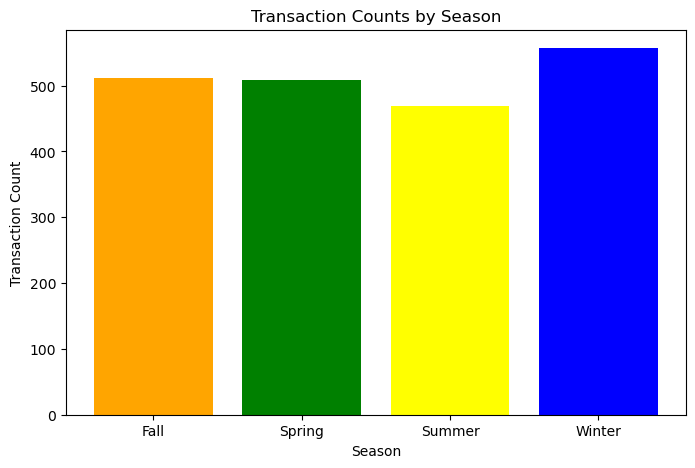

In [36]:
#  How does the number of transactions vary by season (Winter, Spring, Summer, Fall)?
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
# Replace 'your_dataset.csv' with your actual file path or DataFrame
data = pd.read_csv('D:\\retail_transaction_dataset.csv')

# Group by Season and count the number of transactions
transactions_by_season = data.groupby('Season').size().reset_index(name="Transaction count")

print(transactions_by_season)

seasons = transactions_by_season['Season']
transaction_counts = transactions_by_season['Transaction count']

plt.figure(figsize=(8, 5))
plt.bar(seasons,transaction_counts, color=["orange", "green", "yellow", "blue"])
plt.title("Transaction Counts by Season")
plt.xlabel("Season")
plt.ylabel("Transaction Count")
plt.show()


The above we can see tha number of transactions vary by season (Winter, Spring, Summer, Fall).
The most transaction count in winter season and least transaction count in summer season.


1.Distribution of promotions:
The analysis shows that the "None" promotion type has the highest number of transactions across all categories, indicating that most purchases were made without any promotional offers. On the other hand, the "BOGO (Buy One Get One)" promotion appears to attract a significant number of transactions, suggesting its effectiveness in driving purchases.

2.Product preference analysis:
Toothpaste leads the list of most purchased products with 152 units sold, followed by Pickles, Ketchup, Dish Soap, and Paper Towels. This suggests that essential household items, particularly personal care and kitchen products, are the most popular among consumers.

3.City-wise sales Distribution:
Miami's value of 57.45, compared to New York's lower 50.10, highlights significant variation across cities, which may reflect differences in regional factors or market dynamics.


4.Discount impact on sales:
The analysis shows that 1,013 customers had no discount applied, while 1,032 customers received a discount. This nearly even split suggests a strategic approach in applying discounts, potentially aimed at balancing full-price sales with promotional incentives.


5.Payment Method Distribution:For the purchase,customers are more likely to use mobile payment  and the other  three methods used by customers are almost in a same distribution and only a slinght difference is shown. 

6.Repeat Customer Analysis:
The analysis reveals that repeat customers spend significantly more, with an average spending of 108.82 compared to 52.67 for one-time customers. This indicates that customer retention is crucial for boosting overall sales and revenue.

7.Average Spending By Store Type:
The analysis indicates slight cost variation among different store types, with the Convenience Store having the highest total cost at 54.02 and the Specialty Store having the lowest at 51.50. This suggests that store type may influence total cost, potentially reflecting differences in pricing strategies or product offerings.


8.Store Type and Product Diversity:
This uniformity in item counts suggests the data may be in its initial or simplified stage, requiring further variation for more meaningful analysis.

9.Seasonal Promotion Effectiveness:
Winter emerges as the most effective season for promotions, while Summer is the least effective. This suggests a need for businesses to focus their marketing efforts more heavily in Winter and Fall, where consumer engagement is higher.

10.Customer Purchase Behaveior By Season:
The bar chart shows that transaction activity is highest in Winter (557) and lowest in Summer (469), with Fall and Spring having similar transaction counts. This suggests seasonal variations in transaction volumes, peaking in the colder months.

Conclusion:
Overall, the analysis reveals key insights into consumer behavior, promotional effectiveness, and regional market dynamics. It highlights the importance of customer retention, the impact of seasonal promotions, and preferences for essential household products, suggesting strategies for optimizing sales, marketing efforts, and pricing based on these patterns.From the above mentioned factors and analysis for the actionable improvement of sales and purchases.
